In [1]:
import sys
import os

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import Preprocessing.preprocessing as pp
import numpy as np
# from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import math
import Preprocessing.image_processing as ip

In [28]:
import tqdm

In [3]:
 from sklearn.svm import LinearSVC
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler

Load in the data from a csv of pixel data, and a csv of labels

In [4]:
train_csv_x = '/Users/connieli/Documents/229a/Data/train_images.csv'
train_csv_y = '/Users/connieli/Documents/229a/Data/train_labels.csv'

X, Y = pp.load_XY(train_csv_x, train_csv_y)

Reshape the $Y$ vector (works better during the fitting)

Load the validation set

In [5]:
val_csv_x = '/Users/connieli/Documents/229a/Data/val_images.csv'
val_csv_y = '/Users/connieli/Documents/229a/Data/val_labels.csv'
X_val, Y_val = pp.load_XY(val_csv_x, val_csv_y)

## SVM

In [19]:
Y_col = Y[:,1]
Y_valcol = Y_val[:,1]

In [45]:
# Ycol = Y[:,1]
# svmodel = LinearSVC(penalty='l2', loss='squared_hinge', dual=True, C=0.3, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=10)
# svmodel.fit(X, Ycol)
# svmodel.score(X, Ycol)
# Y_valcol = Y_val[:,1]
# svmodel.score(X_val, Y_valcol)

0.62716666666666665

In [8]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_val_scaled = scaler.transform(X_val)

## Tuning C

In [96]:
# Cs = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0 ]

# Cs = [0.0001]

Cs = [0.0001, 0.0006, 0.001, 0.006, 0.01, 0.06, 0.1, 0.6, ]
c_f1_train = np.zeros(len(Cs))
c_f1_val = np.zeros(len(Cs))

for i in range(len(Cs)):
    currC = Cs[i]
    svmodel = LinearSVC(penalty='l2', loss='squared_hinge', dual=True, C=currC, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=10)
    svmodel.fit(X, Ycol)
    c_f1_train[i] = metrics.f1_score(Ycol, svmodel.predict(X))
    c_f1_val[i] = metrics.f1_score(Y_valcol, svmodel.predict(X_val))

#     svm_train_score[i] = svmodel.score(X, Ycol)
#     svm_val_score[i] = svmodel.score(X_val, Y_valcol)


In [101]:
np.exp(-7)

0.00091188196555451624

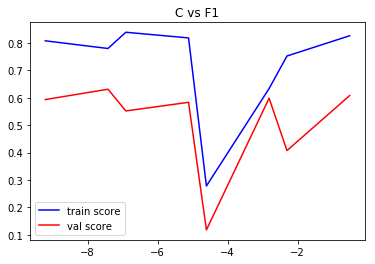

In [100]:
plt.plot(np.log(Cs), c_f1_train,'b', label="train score")
plt.plot(np.log(Cs), c_f1_val, 'r', label="val score")
plt.title("C vs F1")
plt.legend()
plt.show()
# plt.plot(Cs, svm_val_score,'r', label="val score")
# plt.plot(Cs, svm_train_score, 'b', label="train score")
# plt.title("C vs accuracy")
# plt.legend()
# plt.show()

### Scaled SVM

In [20]:
# Cs = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0 ]
# svm_train_score = np.zeros(len(Cs))
# svm_val_score = np.zeros(len(Cs))
# for i in range(len(Cs)):
#     currC = Cs[i]
#     svmodel = LinearSVC(penalty='l2', loss='squared_hinge', dual=True, C=currC, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=10)
#     svmodel.fit(X_scaled, Ycol)
#     svm_train_score[i] = svmodel.score(X_scaled, Ycol)
#     svm_val_score[i] = svmodel.score(X_val_scaled, Y_valcol)

NameError: name 'X_scaled' is not defined

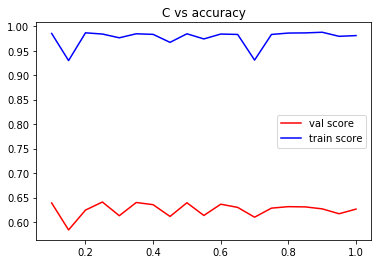

In [75]:
plt.plot(Cs, svm_val_score,'r', label="val score")
plt.plot(Cs, svm_train_score, 'b', label="train score")
plt.title("C vs accuracy")
plt.legend()
plt.show()

In [79]:
svm_train_score[7]
# svm_val_score[7]

0.96699999999999997

### How about we don't scale
We're supposed to scale when using a Gaussian kernel, but that really hurt our accuracy for some reason. So we're not doing it.

### Plotting m vs F1score
Plot m from 0 to 6000 in increments of 500. Use best C so far.

In [102]:
bestC = 0.001

In [103]:
# Fit the model
svmodel_f1 = LinearSVC(penalty='l2', loss='squared_hinge', dual=True, C=bestC, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=10)
svmodel_f1.fit(X, Ycol)

LinearSVC(C=0.001, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=10,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [104]:
incr_size = 500
n_increments = 6000/incr_size

training_sizes = np.zeros([n_increments, 1])
f1_train = np.zeros([n_increments, 1])
f1_val = np.zeros([n_increments, 1])

for i in range(0, n_increments):
    s = (i+1)*incr_size
    training_sizes[i] = s
    curr_x = X[-s:,]
    curr_y = Y_col[-s:,]
    val_x = X_val[-s:,]
    val_y = Y_valcol[-s:,]
#     curr_x = X[0:s,]
#     curr_y = Y_col[0:s,]
#     val_x = X_val[0:s,]
#     val_y = Y_valcol[0:s,]
    f1_train[i] = metrics.f1_score(curr_y , svmodel_f1.predict(curr_x))
    f1_val[i] = metrics.f1_score(val_y , svmodel_f1.predict(val_x))

In [ ]:
plt.plot(training_sizes, precision_train,'b', label="train score")
plt.plot(training_sizes, precision_val,'r', label="val score")
plt.title("Training set size vs F1")
plt.legend()
plt.show()

**F1 score, increment = 1000**

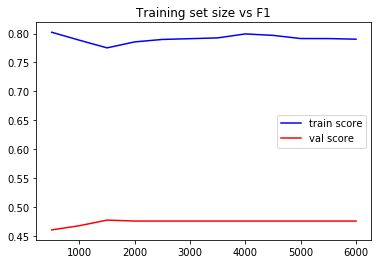

In [105]:
plt.plot(training_sizes, f1_train,'b', label="train score")
plt.plot(training_sizes, f1_val,'r', label="val score")
plt.title("Training set size vs F1")
plt.legend()
plt.show()